<h1>Purpose : To identify what attributes contributed
to the survivors.</h1>

<h3>Attributes</h3>
<ul>
    <li>Age, Sex</li>
    <li>Class</li>
    <li>Embarked</li>
</ul>

<img src="http://1.bp.blogspot.com/-Fvx5ut4Tezw/VLryIq1oiuI/AAAAAAAABY4/XuEDMiT3mJE/s1600/titanic-7.jpg">

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#data
test=pd.read_csv("test.csv")
train=pd.read_csv("train.csv")

In [3]:
#General info.
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<h1>Age, Sex</h1>

In [8]:
#count the number of missin values.
missing_values=train["Age"].isnull().sum()
missing_values

177

In [9]:
#there are 177 missing values. Fill in rational values.
age_mean=train["Age"].mean()
age_std=train["Age"].std()

print("mean : "+str(age_mean))
print("std : "+str(age_std))

mean : 29.69911764705882
std : 14.526497332334044


In [10]:
#generate random values.
random_values=np.random.randint(age_mean-age_std,age_mean+age_std,size=177)

In [11]:
#fill in the random values to null values.
train["Age"][train["Age"].isnull()==True]=random_values

/Users/watanabesouta/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


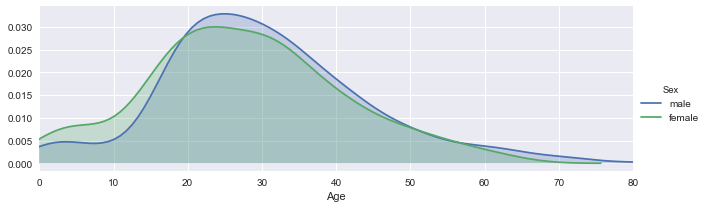

In [12]:
#FaceGrid
fig = sns.FacetGrid(train, hue="Sex",aspect=3)
fig.map(sns.kdeplot,'Age',shade= True)
oldest = train['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

In [13]:
#more specific. Add another attribute, sex.
#definition: under10=child.
def male_female_child (passenger):
    age, sex = passenger
    if age < 15:
        return "child"
    else:
        return sex

In [14]:
#add a new colum
train["person"]=train[["Age","Sex"]].apply(male_female_child, axis=1)

In [15]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,23.0,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


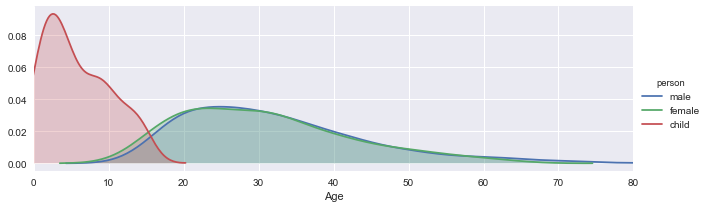

In [16]:
fig = sns.FacetGrid(train, hue="person",aspect=3)
fig.map(sns.kdeplot,'Age',shade= True)
oldest = train['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

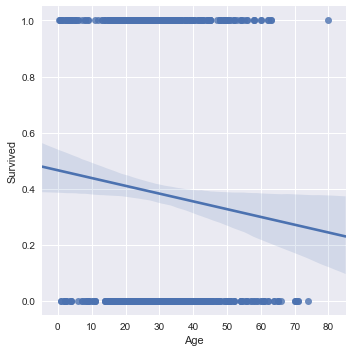

In [17]:
#the relationship between "Age" and "Survived".
sns.lmplot("Age", "Survived", data=train)

<p>Generally speaking, the younger passengers were, the more passengers survived.</p>

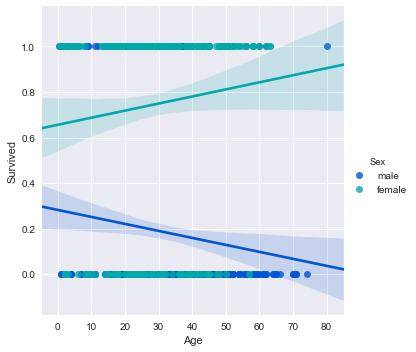

In [18]:
sns.lmplot("Age", "Survived", hue= "Sex", data=train, palette="winter")

<h2>Summary</h2>
<p>There were three classes, male, female, child. (1)male: the older passengers were, the less possibility they had. (2)female: opposite to male, the older passengers were, the more possibility they had. (3)child: Survived with high possibility. We can guess that children were given the first priority to evacuate.</p>

<h1>Class</h1>

In [23]:
#count the number of passengers in each class.
print(train.Pclass.value_counts(dropna=False))

3    491
1    216
2    184
Name: Pclass, dtype: int64


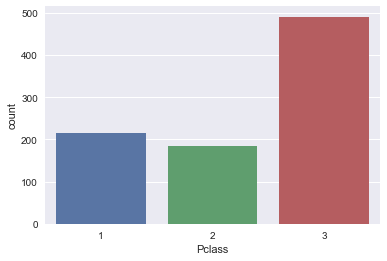

In [24]:
sns.countplot("Pclass" ,data=train)

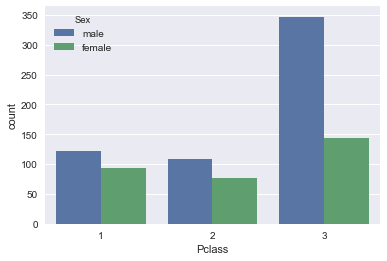

In [25]:
#more specific
sns.countplot("Pclass", data=train, hue="Sex")

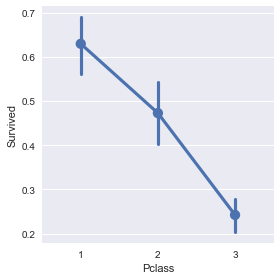

In [26]:
#The relationship between "Pclass" and "Survived".
sns.factorplot("Pclass","Survived",data=train,order=[1,2,3])

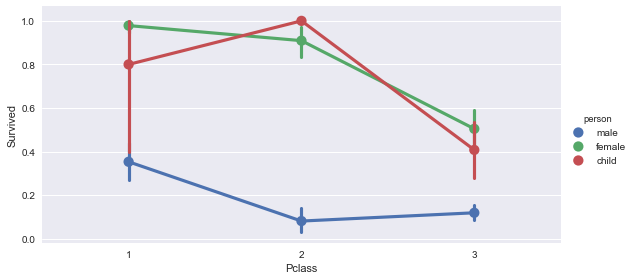

In [28]:
sns.factorplot("Pclass","Survived", hue="person", data= train, order=[1,2,3], aspect=2)

<h2>Summary</h2>
<p>Pclass1 was the highest one. Pclass3 was the lowest one. Therefore, Class1  passengers were three times as safe as Class3 passengers. However, if you focus on "Sex", the result was slightly different.  </P>

<h1>Place</h1>

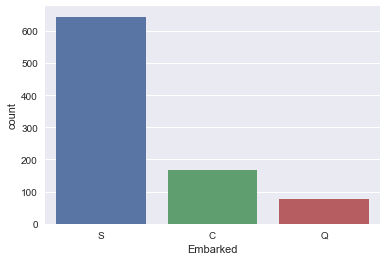

In [30]:
sns.countplot("Embarked", data=train)

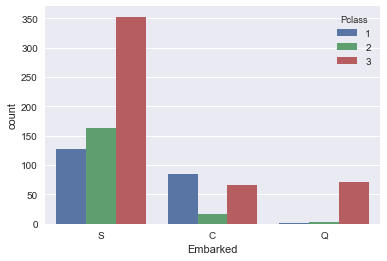

In [34]:
sns.countplot("Embarked", data=train, hue="Pclass")

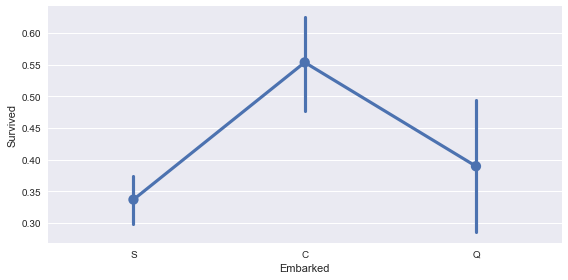

In [33]:
sns.factorplot("Embarked","Survived", data= train, aspect=2)

<h2>Summary</h2>
<p>C was the highest. I guess it was because there were many Class1 passengers in "C" comared with others.</p>